In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections

In [2]:
file_path = os.getcwd()
predsdir = os.path.join(file_path, '../models/from_combined/run_2018-12-6_h0-m0')
pred = pd.read_csv(os.path.join(predsdir, 'dev_lgb_reg_preds.csv'))

In [3]:
pred[:3]

,Unnamed: 0,CELL,DRUG,csite,ctype,simplified_csite,simplified_ctype,AUC1,AUC1_pred,AUC1_error,AUC1_sq_error
0,0,CCLE.KE97,CCLE.13,leukemia/lymphoma,Lymphoid Leukemia,hematologic/blood,hematologic/blood,0.3037,0.420672,0.116972,0.013682
1,1,CCLE.UACC812,CCLE.17,breast,Breast Invasive Carcinoma,breast,breast,0.9463,0.947706,0.001406,0.000002
2,2,CCLE.SW1573,CCLE.8,lung,Lung Adenocarcinoma,lung,lung,0.9465,0.938520,0.007980,0.000064


In [4]:
target_name = 'AUC1'

In [5]:
rsp_thres = 0.5
pred['R'] = pred['AUC1'] < rsp_thres
print('Total responded {:.3f} %'.format(pred['R'].sum()/len(pred)))

Total responded 0.114 %


In [6]:
# Group by drug/ctype and show boxplot of AUC1_pred.
# Also, per drug/ctype, show mean/median of prediction 

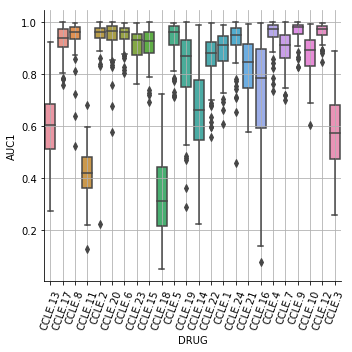

In [7]:
g = sns.catplot(data=pred, kind='box', x='DRUG', y=target_name, showfliers=True, sym='r.') # 'sym' doesn't affect
g.set_xticklabels(rotation=70)
# ax = sns.swarmplot(data=data, x='DRUG', y='AUC', color='0.25') # takes too long
# ax = sns.catplot(data=data, kind='box', x='DRUG', y='AUC', hue='ctype') # takes too long
plt.grid(True)
plt.tight_layout()
# plt.savefig(path, bbox_inches='tight')

In [8]:
# fig, ax = plt.subplots(figsize=(15, 8))
# g = sns.catplot(ax=ax, data=pred, kind='box', x='ctype', y=target_name, showfliers=True, sym='r.') # 'sym' doesn't affect
# g.set_xticklabels(rotation=70)
# # ax = sns.swarmplot(data=data, x='DRUG', y='AUC', color='0.25') # takes too long
# # ax = sns.catplot(data=data, kind='box', x='DRUG', y='AUC', hue='ctype') # takes too long
# plt.grid(True)
# plt.tight_layout()
# # plt.savefig(path, bbox_inches='tight')

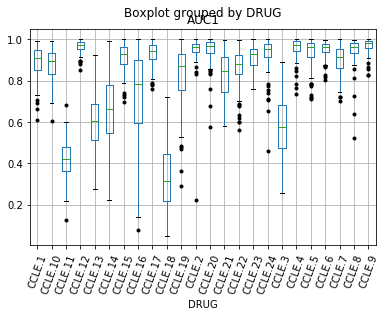

In [9]:
# fig, ax = plt.subplots()
bp = pred.boxplot(column=target_name, by='DRUG', rot=70,
                  fontsize=10, sym='k.', return_type='both') # how to control alpha of fliers?

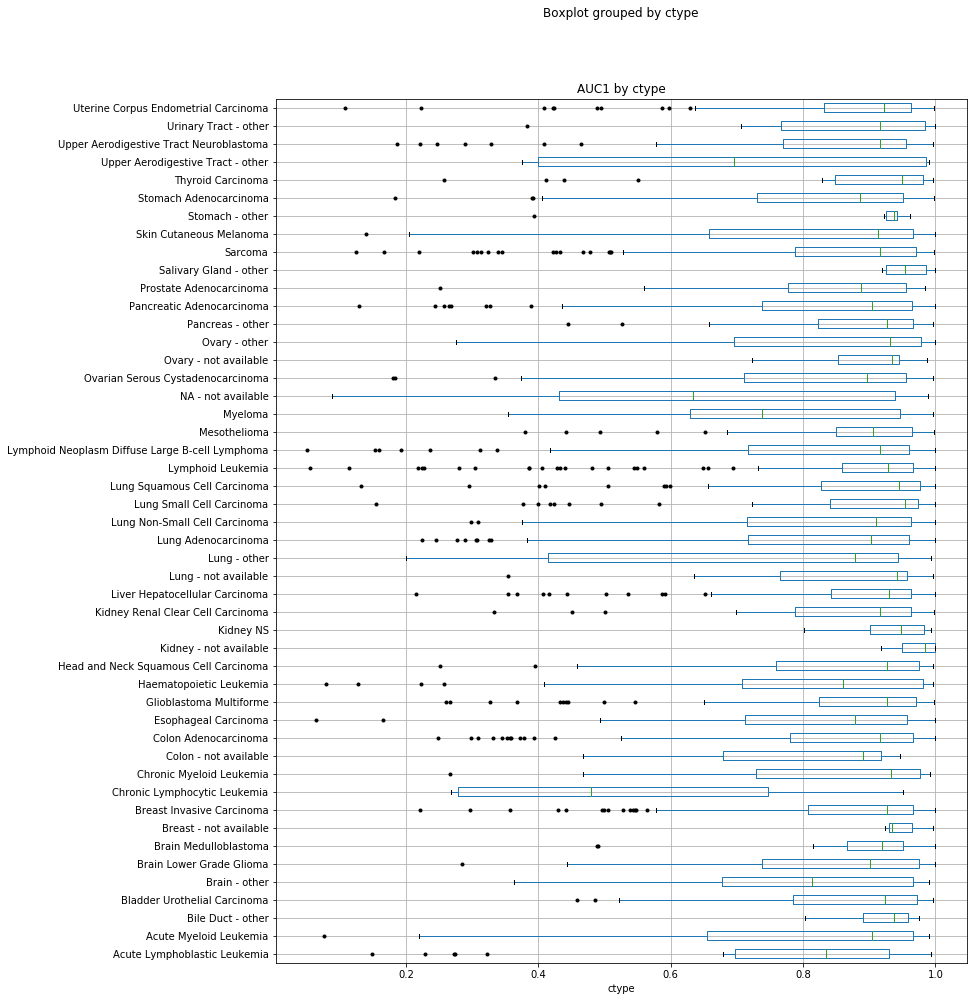

In [32]:
# bp = pred.boxplot(column=target_name, by='ctype', rot=88, fontsize=10, sym='k.',
#                   return_type='both', figsize=(12, 6)) # how to control alpha of fliers?

fig, ax = plt.subplots(figsize=(12, 16))
bp = pred.boxplot(ax=ax, column='AUC1', by='ctype', rot=0, fontsize=10, sym='k.',
                  return_type='both', vert=False); # how to control alpha of fliers?
ax.set_title('AUC1 by ctype');
# ax.set_xlim([-0.01, 0.2]);

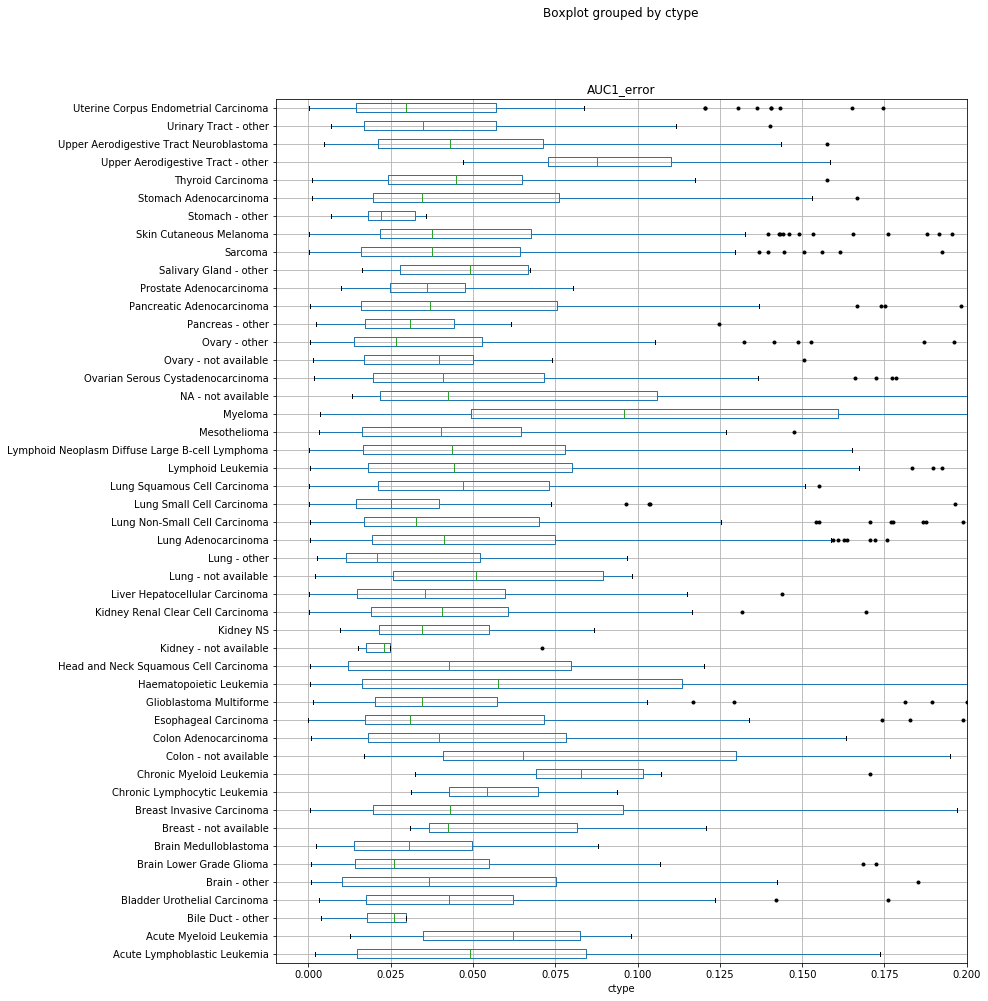

In [27]:
fig, ax = plt.subplots(figsize=(12, 16))
bp = pred.boxplot(ax=ax, column='AUC1_error', by='ctype', rot=0, fontsize=10, sym='k.',
                  return_type='both', vert=False) # how to control alpha of fliers?
ax.set_title('AUC1_error by ctype');
ax.set_xlim([-0.01, 0.2]);

# EDA

In [171]:
rsp = pd.read_csv(os.path.join(DATADIR, 'combined_single_response_agg'), sep='\t')
rsp = rsp[['SOURCE', 'CELL', 'DRUG', 'AUC', 'AUC1', 'IC50']]
print(rsp.shape)
rsp[:2]

(4484081, 6)


,SOURCE,CELL,DRUG,AUC,AUC1,IC50
0,CCLE,CCLE.1321N1,CCLE.1,0.8330,0.8983,4.883
1,CCLE,CCLE.1321N1,CCLE.10,0.7909,0.8864,5.217


In [172]:
rsp.groupby('SOURCE').agg({'CELL': 'nunique'}).reset_index()

,SOURCE,CELL
0,CCLE,504
1,CTRP,887
2,GDSC,1075
3,NCI60,59
4,SCL,65
5,SCLC,70
6,gCSI,409


In [173]:
# load_drug_info()
path = os.path.join(DATADIR, 'drug_info')
df_info = pd.read_table(path, dtype=object)
df_info['PUBCHEM'] = 'PubChem.CID.' + df_info['PUBCHEM']
df_info['Drug'] = df_info['PUBCHEM']
print(df_info.shape)

df_info['SOURCE'] = df_info['ID'].map(lambda x: x.split('.')[0])  # (ap)
df_info.drop(columns=['Drug'], inplace=True)
df_info.rename(columns={'ID': 'DRUG'}, inplace=True)

df_info[:2]

(846, 7)


,DRUG,NAME,CLEAN_NAME,SMILES,INCHIKEY,PUBCHEM,SOURCE
0,CCLE.1,AEW541,AEW541,C1CN(C1)CC2CC(C2)N3C=C(C4=C3N=CN=C4N)C5=CC(=CC...,AECDBHGVIIRMOI-UHFFFAOYSA-N,PubChem.CID.11476171,CCLE
1,CCLE.10,ZD-6474,ZD6474,CN1CCC(CC1)COC2=C(C=C3C(=C2)N=CN=C3NC4=C(C=C(C...,UHTHHESEBZOYNR-UHFFFAOYSA-N,PubChem.CID.3081361,CCLE


In [174]:
df_info.groupby('SOURCE').agg({'DRUG': 'nunique'}).reset_index()

,SOURCE,DRUG
0,CCLE,24
1,CTRP,544
2,GDSC,262
3,gCSI,16


In [175]:
print(df_info[['DRUG', 'NAME', 'CLEAN_NAME']].shape)
print(rsp.shape)

(846, 3)
(4484081, 6)


In [176]:
rsp = pd.merge(df_info[['DRUG', 'NAME', 'CLEAN_NAME']], rsp, on='DRUG', how='inner')
print(rsp.shape)

(637089, 8)


In [177]:
rsp.groupby('SOURCE').agg({'DRUG': 'nunique'}).reset_index()

,SOURCE,DRUG
0,CCLE,24
1,CTRP,544
2,GDSC,247
3,gCSI,16


In [178]:
df, meta = utils.load_lincs1000(dataset='raw', sources=['ccle', 'ctrp', 'gdsc', 'gcsi', 'nci60'])
meta = meta[['Sample', 'source', 'core_str', 'csite', 'ctype', 'simplified_csite', 'simplified_ctype']]
meta.rename(columns={'Sample': 'CELL'}, inplace=True)


Dataset: combined_rnaseq_data_lincs1000
df_rna (2917, 943)
meta   (2917, 20)
CCLE     1018
CTRP      812
GDSC      670
gCSI      357
NCI60      60
Name: Sample, dtype: int64


In [179]:
meta.nunique()

CELL                2917
source                 5
core_str            1039
csite                 27
ctype                 66
simplified_csite      15
simplified_ctype      17
dtype: int64

In [180]:
df = pd.merge(rsp, meta, on='CELL', how='inner')
print(df.shape)
df[:2]

(519968, 14)


,DRUG,NAME,CLEAN_NAME,SOURCE,CELL,AUC,AUC1,IC50,source,core_str,csite,ctype,simplified_csite,simplified_ctype
0,CCLE.1,AEW541,AEW541,CCLE,CCLE.22RV1,0.7153,0.7760,5.66,ccle,22Rv1,prostate,Prostate Adenocarcinoma,prostate,prostate
1,CCLE.10,ZD-6474,ZD6474,CCLE,CCLE.22RV1,0.9579,0.9541,NaN,ccle,22Rv1,prostate,Prostate Adenocarcinoma,prostate,prostate


In [181]:
df.groupby('SOURCE').agg({'CELL': 'nunique'}).reset_index()

,SOURCE,CELL
0,CCLE,474
1,CTRP,812
2,GDSC,670
3,gCSI,357
